# Pytorch workflow
lets do a workflow

In [2]:
what_we_cover = {1 : "data",
                 2 : 'build',
                 3:"fit",
                 4: "eval",
                 5:"save load",
                 6:"putting together"
                }

In [3]:
import torch
from torch import nn
import matplotlib.pyplot as plt


## data and prep

can be almost anything 
- csv
- img
- videos
- audio
- text

1. create numerical representation of data
2. build model to recognise paterns in data

lets start with some know data using lin regres

In [4]:
#known param
weight = .7
bias = .3 

start = 0 
end = 1
step = .02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
y

tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260],
        [0.4400],
        [0.4540],
        [0.4680],
        [0.4820],
        [0.4960],
        [0.5100],
        [0.5240],
        [0.5380],
        [0.5520],
        [0.5660],
        [0.5800],
        [0.5940],
        [0.6080],
        [0.6220],
        [0.6360],
        [0.6500],
        [0.6640],
        [0.6780],
        [0.6920],
        [0.7060],
        [0.7200],
        [0.7340],
        [0.7480],
        [0.7620],
        [0.7760],
        [0.7900],
        [0.8040],
        [0.8180],
        [0.8320],
        [0.8460],
        [0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

### spliting data into training and test data

three datasets
training set = 60-80
validation set = 10-20 (making sure it is learning during learning)
test set = 10-20 (final eval)

the goal is for generalization 

What our model does start with weight and bias
- look at training data 
- try to get close to where we need to be

but how?
1. grad descent 
2. backprop

In [5]:
# create a train/test set
train_split = int(.8 * len (X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_test)

(40, 10)

how might we visualize our data?

In [6]:
def plot_pred(train_data = X_train, train_labels = y_train, test_data = X_test, test_labels = y_test, predictions=None):
    """
    Plots training and test data 
    Args:
        train_data (_type_, optional): _description_. Defaults to X_train.
        train_labels (_type_, optional): _description_. Defaults to y_train.
        test_data (_type_, optional): _description_. Defaults to X_test.
        test_labels (_type_, optional): _description_. Defaults to y_test.
    """
    plt.figure(figsize=(10,7))
    plt.scatter(train_data, train_labels, c="b", s=4, label="training data")
    
    plt.scatter(test_data, test_labels, c='g', s=4, label="Testing data")
    
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label='pred')
        
    plt.legend()
    plt.show()


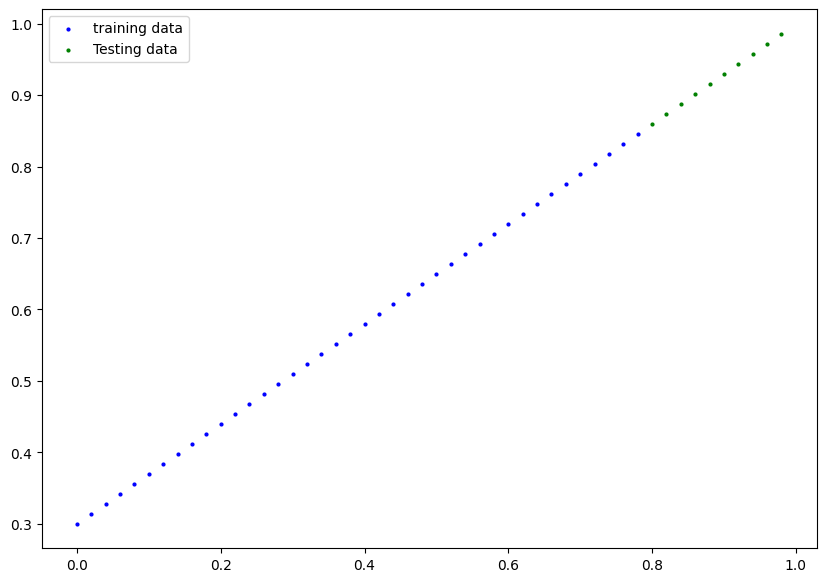

In [7]:
plot_pred(X_train, y_train, X_test, y_test)

## build our first model
let do it


In [8]:
## class inherits from nn.module
# almost everything inherits from nn.module has nice inbuild things
# model should subclass this class all modules contain other modules
class LinearRegressionModel(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        ##this is the model weights we want to require grad because we cant to keep the gradient
        #in fact this is only one tensor with 
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.bias =  nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        
        # any subclass of nn.module requires a foward method
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data 
        # this is the foward pass
        return self.weights * x +  self.bias # this is the linear regresstion 

### main pytorch classes
- torch.nn contains all building blocks for computational graphs
- torch.params what the nn tries to learn
- torch.nn.Module base class for nn modules
- torch.optim


In [9]:
# create random seed 
torch.manual_seed(42)

model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [10]:
model_0.state_dict()
#list parameters in dictionary format

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [11]:
#making prep using torch.inference mode
with torch.inference_mode():
    y_pred = model_0(X_test)
    
y_pred

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [12]:
with torch.no_grad():
    y_pred = model_0(X_test)
    
y_pred

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

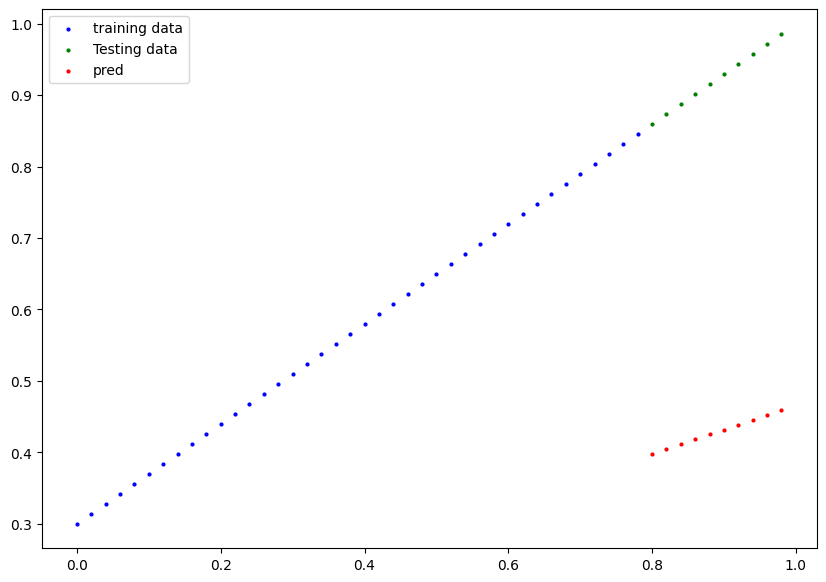

In [13]:
plot_pred(predictions=y_pred)

In [14]:
# the idea of training a model is to move from unknown to known models

#use a loos function to find how bad model representation is

"""
    what we need to train 
    loss function -> parameter?
    optimizer -> parameter? 
"""
 
"""
we also need a test and train loop
"""

loss_fn = nn.L1Loss()


# in optim set model params and lr
# small lr results to small jumps, important to find good center
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=.01)

### building training loop!
0. loop through data
1. foward pass .foward() (foward prop)
2. Calc loss of function (compare foward pass to ground truth)
3. Optimizer zero grad
4. Loss backward (calc gradient wth respect to loss)
5. optim step

In [15]:
# an epoch is one loop through the data...
epochs = 400

torch.manual_seed(42)

epoch_count = []
loss_values = []
test_loss_values = []

# loop through data
for epoch in range(epochs):
    #Set the model to training mode
    model_0.train() #train mode in pytorch sets all parameters that req grad to req grad 
    
    # 1. foward pass
    y_pred = model_0(X_train)
    
    # 2. Calc loss (MAE)
    loss = loss_fn(y_pred, y_train)
    print("loss", loss)
    
    #optimizer zero grad (this resets the optimizer)
    optimizer.zero_grad()
    
    #perform back prop
    loss.backward()
    
    # Step the optim
    optimizer.step()
    
    model_0.eval() #turns of grad tracking
    with torch.inference_mode(): #turns off things befoind the scenes
        test_pred = model_0(X_test)
        
        #calc loss
        test_loss = loss_fn(test_pred, y_test)
    if (epoch % 10 == 0):
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f'epoch: {epoch}| loss: {loss}| test_loss:{test_loss}')
        print(model_0.state_dict())
    
    

loss tensor(0.3129, grad_fn=<MeanBackward0>)
epoch: 0| loss: 0.31288138031959534| test_loss:0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
loss tensor(0.3014, grad_fn=<MeanBackward0>)
loss tensor(0.2898, grad_fn=<MeanBackward0>)
loss tensor(0.2783, grad_fn=<MeanBackward0>)
loss tensor(0.2668, grad_fn=<MeanBackward0>)
loss tensor(0.2553, grad_fn=<MeanBackward0>)
loss tensor(0.2438, grad_fn=<MeanBackward0>)
loss tensor(0.2322, grad_fn=<MeanBackward0>)
loss tensor(0.2207, grad_fn=<MeanBackward0>)
loss tensor(0.2092, grad_fn=<MeanBackward0>)
loss tensor(0.1977, grad_fn=<MeanBackward0>)
epoch: 10| loss: 0.1976713240146637| test_loss:0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
loss tensor(0.1862, grad_fn=<MeanBackward0>)
loss tensor(0.1746, grad_fn=<MeanBackward0>)
loss tensor(0.1631, grad_fn=<MeanBackward0>)
loss tensor(0.1516, grad_fn=<MeanBackward0>)
loss tensor(0.1401, grad_fn=<MeanBackward0>)
l

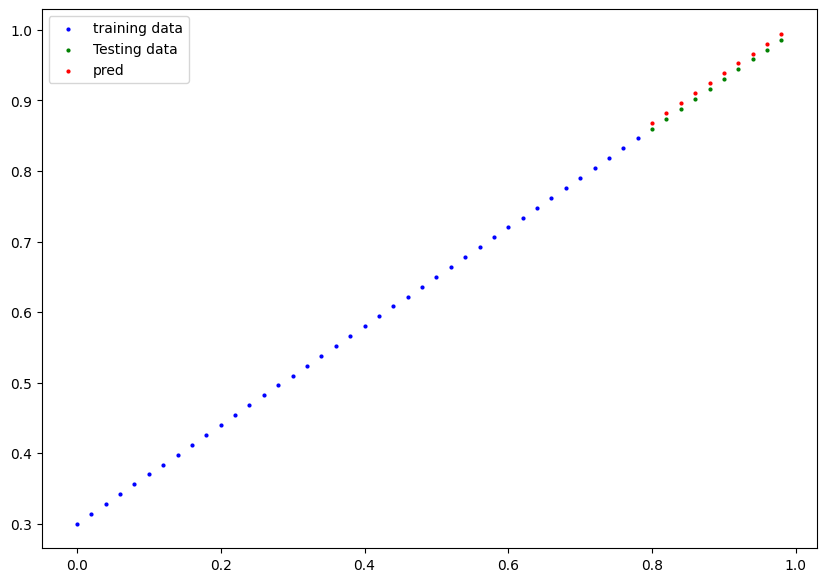

In [16]:
with torch.inference_mode():
    new_y_pred = model_0(X_test)

plot_pred(predictions=new_y_pred)

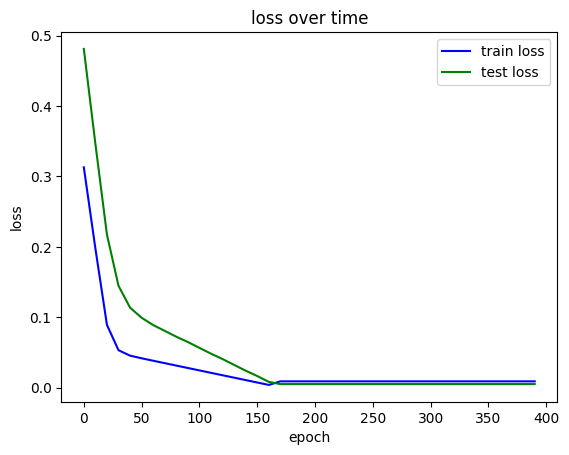

In [17]:
with torch.inference_mode():
    fig, ax = plt.subplots()
    ax.plot(epoch_count, loss_values, c='b', label="train loss")
    ax.plot(epoch_count, test_loss_values, c="g", label="test loss")
    ax.set_title('loss over time')
    ax.set_xlabel('epoch')
    ax.set_ylabel('loss')
    ax.legend()
    plt.show()

In [18]:
print(f'epoch {epoch}, loss {loss_values}, test_loss{test_loss_values}')

epoch 399, loss [tensor(0.3129, grad_fn=<MeanBackward0>), tensor(0.1977, grad_fn=<MeanBackward0>), tensor(0.0891, grad_fn=<MeanBackward0>), tensor(0.0531, grad_fn=<MeanBackward0>), tensor(0.0454, grad_fn=<MeanBackward0>), tensor(0.0417, grad_fn=<MeanBackward0>), tensor(0.0382, grad_fn=<MeanBackward0>), tensor(0.0348, grad_fn=<MeanBackward0>), tensor(0.0313, grad_fn=<MeanBackward0>), tensor(0.0279, grad_fn=<MeanBackward0>), tensor(0.0245, grad_fn=<MeanBackward0>), tensor(0.0210, grad_fn=<MeanBackward0>), tensor(0.0176, grad_fn=<MeanBackward0>), tensor(0.0142, grad_fn=<MeanBackward0>), tensor(0.0107, grad_fn=<MeanBackward0>), tensor(0.0073, grad_fn=<MeanBackward0>), tensor(0.0039, grad_fn=<MeanBackward0>), tensor(0.0089, grad_fn=<MeanBackward0>), tensor(0.0089, grad_fn=<MeanBackward0>), tensor(0.0089, grad_fn=<MeanBackward0>), tensor(0.0089, grad_fn=<MeanBackward0>), tensor(0.0089, grad_fn=<MeanBackward0>), tensor(0.0089, grad_fn=<MeanBackward0>), tensor(0.0089, grad_fn=<MeanBackward0>),

In [19]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

## saving model in pytorch

1. torch.save() - save model
2. torch.load() - allows you to load
3. torch.nn.module.load_stat_dict() - allows you to load a dictionary

In [20]:
# save and load state dic 
from pathlib import Path

# 1 create dir
MODEL_PATH = Path('../models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# Create Model Path
MODEL_NAME = "00_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model Stat dict

torch.save(model_0.state_dict(), MODEL_SAVE_PATH)

In [21]:
dict_state = torch.load(MODEL_SAVE_PATH)
dict_state

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [22]:
loaded_model_0 = LinearRegressionModel()

In [24]:
loaded_model_0.load_state_dict(dict_state)

<All keys matched successfully>

In [26]:
loaded_model_0.eval()
with torch.inference_mode():
    y_pred_load = loaded_model_0(X_test)

with torch.inference_mode():
    y_pred_model = model_0(X_test)
    
y_pred_load == y_pred_model

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## putting it all together
lets go back through the steps 

In [49]:
import torch 

#1 create data

weight = .5
bias = .7

X = torch.arange(0, 1, .02)
X
y = weight * X + bias
split_len = int(.8 * len(X))
X_train, y_train = X[:split_len], y[:split_len]
X_test, y_test = X[split_len:], y[split_len:]

In [86]:
import matplotlib.pyplot as plt

def visPLot(X_te=X_test, y_te=y_test, X_tr=X_train, y_tr=y_train, pred=None):
    fig, ax = plt.subplots()
    ax.scatter(X_te, y_te, c='r', s=5, label="test_data")
    ax.scatter(X_tr, y_tr, c="g",s=5, label="train_data")
    ax.set_title('data and predictions')
    ax.set_ylabel("target")
    ax.set_xlabel("input")
    if (pred is not None):
        print(X_te.shape)
        print(pred.shape)
        ax.scatter(X_te, pred, c='b', s=5 ,label='pred')

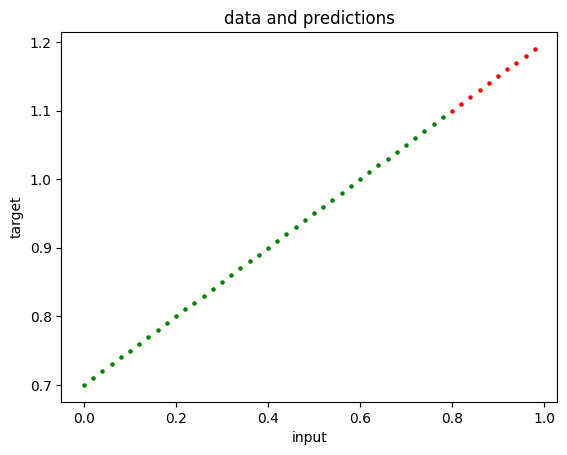

In [83]:
visPLot()

In [66]:
import torch.nn as nn

device = "gpu" if torch.cuda.is_available() else "cpu"

In [74]:
class linearRegresModel(nn.Module):
    def __init__(self):
        super().__init__()

        self.weight = nn.Parameter(torch.randn(1, requires_grad=True, device=device))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, device=device))
        
    def forward(self, x:torch.Tensor) -> torch.Tensor:
        return self.weight * x + self.bias

In [75]:
model_01 = linearRegresModel()
model_01.state_dict()

OrderedDict([('weight', tensor([0.5349])), ('bias', tensor([0.8094]))])

torch.Size([10])
torch.Size([10])


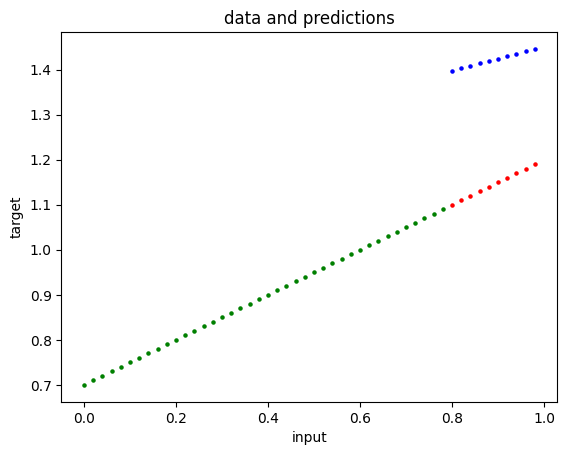

In [87]:
start_pred = model_01(y_test)

with torch.inference_mode():
    visPLot(pred=start_pred)

In [90]:
#define optim and loss
optim = torch.optim.SGD(model_01.parameters(), lr=0.01)
loss_fun0 = torch.nn.MSELoss()


In [92]:
epochs=700

epoch_list = []
mod0_train_loss = []
mod0_test_loss = []

for epoch in range(epochs):
    #forward pass
    model_01.train()
    
    y_pred = model_01(X_train)
    
    #eval loss
    loss0 = loss_fun0(y_pred, y_train)
    
    #zero grad
    optim.zero_grad()
    
    #back prop
    loss.backward()
    
    optim.step()
    
    model_01.eval()
    
    if epoch % 10 == 0:
        with torch.inference_mode():
            y_test_pred = model_01(y_test)
            loss_pred = loss_fun0(y_test_pred, y_test)
            epoch_list.append(epoch)
            mod0_train_loss.append(loss0)
            mod0_test_loss.append(loss_pred) 
            print(f'epoch {epoch}, loss {loss0}, train loss {loss_pred}')

RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.